# Check which questions have been answered correctly by GELECTRA

In [1]:
%cd ..

C:\Users\Stefan.Beuchert\Desktop\backup_from_kubectl


In [2]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

In [3]:
import pandas as pd

from src.get_data import enhance_data_with_correctness_of_the_prediction

## Get Data

In [4]:
# load data
data_df = pd.read_json(source_path_for_data)
# data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df.head()

,question,answers,context,document_id,is_impossible,usage,prediction,explanation
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,"{'position_id': {'0': 0, '1': 1, '2': 2, '3': ..."
36553,Wer wanderte nach North Carolina Anfang des 20...,"[{'answer_id': 36895, 'document_id': 40789, 'q...",North_Carolina\n\n==== Europäische Amerikaner ...,40789,False,test,eine Gruppe orthodoxer Einwanderer aus der Ukr...,"{'position_id': {'0': 0, '1': 1, '2': 2, '3': ..."
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,"{'position_id': {'0': 0, '1': 1, '2': 2, '3': ..."
37392,Wann starb Athanasius der Große?,"[{'answer_id': 37749, 'document_id': 41075, 'q...","Athanasius_der_Große\nGriechische Ikone, Titul...",41075,False,test,2. Mai 373,"{'position_id': {'0': 0, '1': 1, '2': 2, '3': ..."
37351,Welche Länder liegen östlich des Irans?,"[{'answer_id': 37706, 'document_id': 41082, 'q...",Iran\n\n=== Antike und Mittelalter ===\nDas he...,41082,False,test,Indien und China,"{'position_id': {'0': 0, '1': 1, '2': 2, '3': ..."


## Method for comparing ground truth and prediction

This Method is not perfect, since often the prediction is a bit shorter than the perfect answer, which markes it as wrong, where you could theoreticaly argue that it still pases as the correct answer.

For example:

    ID: 41685
    question: "Mit wem strebte Stalin laut Gerhard Weinberg vor dem 2. Weltkrieg ein Bündnis an?"
    prediction: "Hitler"
    possible_answers: ['mit hitler', 'mit hitler']

For evaluation the prediction Excact Match (EM) is used. If the prediction does not exactly match one of the possible answers given for each question, it is classified as wrong. If not it is classified as correct. There is no middle ground where the prediction catches a subset of the correct answer (overlap).

In [5]:
if False: # the following content was moved to get_data.py

    def check_if_prediction_is_correct(row):

        prediction = str.lower(row['prediction'])
        possible_answers_list_of_dicts = row['answers']

        possible_answers_list = [str.lower(answer_dict['text']) for answer_dict in possible_answers_list_of_dicts]

        for possible_answer in possible_answers_list:

            # decode data to reduce errors like "−27\xa0°C" which should be "−27 °C"
            possible_answer_decoded = unicodedata.normalize("NFKD", possible_answer)

            # also decode the prediction, just to make sure both have the same format
            prediction_decoded = unicodedata.normalize("NFKD", prediction)

            if possible_answer_decoded == prediction_decoded:

                return True

        return False
    data_df['prediction_correct'] = data_df.apply(lambda row: check_if_prediction_is_correct(row), axis=1)

In [6]:
data_df = enhance_data_with_correctness_of_the_prediction(data_df)

## Visualize data distribution

<AxesSubplot:>

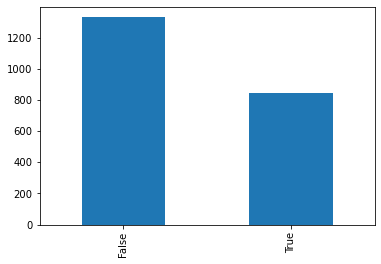

In [7]:
data_df['prediction_correct'].value_counts().plot.bar()